### Loading Required Libraries

In [1]:
#Data preprocessing:
import pandas as pd
import numpy as np
#Visualisations:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
#test for stationarity:
from statsmodels.tsa.stattools import adfuller
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
#ARIMA model:
from statsmodels.tsa.arima_model import ARIMA

/Users/admin/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Train dataset

In [2]:
#uploading train dataset
train = pd.read_csv("train_aWnotuB.csv",parse_dates=[0],index_col="DateTime")

In [3]:
#first few rows of train
train.head()

,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041


In [4]:
#dimensions of train dataset
train.shape

(48120, 3)

In [5]:
#train dataset datatypes
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48120 entries, 2015-11-01 00:00:00 to 2017-06-30 23:00:00
Data columns (total 3 columns):
Junction    48120 non-null int64
Vehicles    48120 non-null int64
ID          48120 non-null int64
dtypes: int64(3)
memory usage: 1.5 MB


In [6]:
#summary statistics of train dataset
train.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [7]:
#changing the data type of "Vehicles" column from integer to float as required for further calculations
train.Vehicles = train.Vehicles.astype("float64")

### Dividing train dataset into four seperate dataframes based on four types of "Junction"

In [8]:
train1 = train[train["Junction"] == 1]
train1_df = train1[["Vehicles"]]

In [9]:
train2 = train[train["Junction"] == 2]
train2_df = train2[["Vehicles"]]

In [10]:
train3 = train[train["Junction"] == 3]
train3_df = train3[["Vehicles"]]

In [11]:
train4 = train[train["Junction"] == 4]
train4_df = train4[["Vehicles"]]

In [12]:
#checking the dimensions of the dataset created
[train1_df.shape,train2_df.shape,train3_df.shape,train4_df.shape]

[(14592, 1), (14592, 1), (14592, 1), (4344, 1)]

# Test dataset

In [13]:
#uploading test dataset
test = pd.read_csv("test_BdBKkAj.csv",parse_dates=[0],index_col="DateTime")

In [14]:
#first few rows of test dataset
test.head()

,Junction,ID
DateTime,,
2017-07-01 00:00:00,1,20170701001
2017-07-01 01:00:00,1,20170701011
2017-07-01 02:00:00,1,20170701021
2017-07-01 03:00:00,1,20170701031
2017-07-01 04:00:00,1,20170701041


In [15]:
#dimensions of test dataset
test.shape

(11808, 2)

In [16]:
#test dataset datatypes
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11808 entries, 2017-07-01 00:00:00 to 2017-10-31 23:00:00
Data columns (total 2 columns):
Junction    11808 non-null int64
ID          11808 non-null int64
dtypes: int64(2)
memory usage: 276.8 KB


### Dividing test dataset into four seperate dataframes based on four types of "Junction"

In [17]:
test1 = test[test["Junction"] == 1]
test1_df = test1.drop(["Junction","ID"],axis=1)

In [18]:
test2 = test[test["Junction"] == 2]
test2_df = test2.drop(["Junction","ID"],axis=1)

In [19]:
test3 = test[test["Junction"] == 3]
test3_df = test3.drop(["Junction","ID"],axis=1)

In [20]:
test4 = test[test["Junction"] == 4]
test4_df = test4.drop(["Junction","ID"],axis=1)

In [21]:
#checking the dimensions of the dataset created
[test1_df.shape,test2_df.shape,test3_df.shape,test4_df.shape]

[(2952, 0), (2952, 0), (2952, 0), (2952, 0)]

# Working with the first train dataframe (train1_df) where "junction" = 1

### Plotting the train1 dataframe

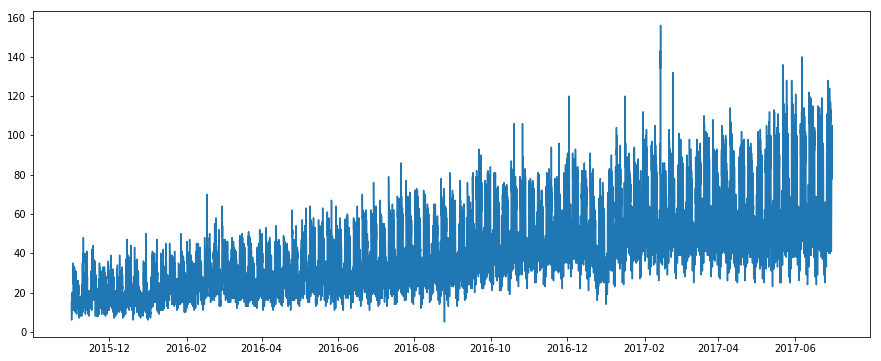

In [22]:
plt.plot(train1_df)

### Creating a function to test the stationarity of the data

In [23]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.iloc[:,0].values, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

/Users/admin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  after removing the cwd from sys.path.
/Users/admin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  """


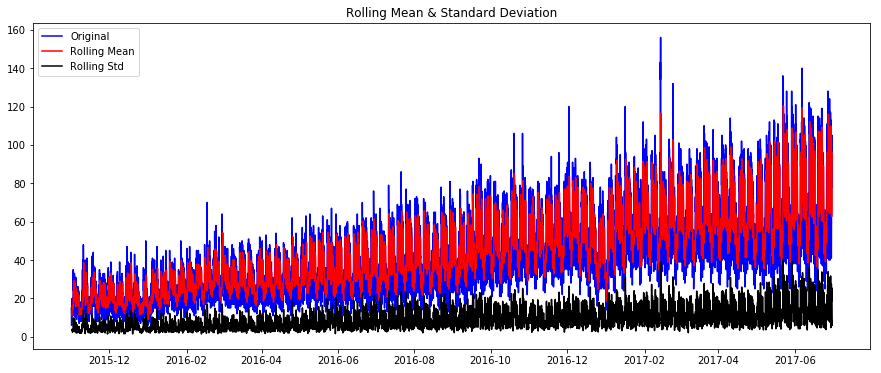

Results of Dickey-Fuller Test:
Test Statistic                -7.148078e+00
p-value                        3.193843e-10
#Lags Used                     4.200000e+01
Number of Observations Used    1.454900e+04
Critical Value (1%)           -3.430800e+00
Critical Value (5%)           -2.861739e+00
Critical Value (10%)          -2.566876e+00
dtype: float64


In [24]:
test_stationarity(train1_df)

In [25]:
float('-7.148078e+00') < float ('-3.430800e+00')

True

Since the value of Test Statistic is less than Critical Value at 1% therefore, we can say with 99% confidence that this series is stationery

## ACF & PACF for order of ARIMA model

In [26]:
#creating diffs by 1 period
ts_diff1 = train1_df - train1_df.shift()
ts_diff1.dropna(inplace=True)

In [27]:
lag_acf1 = acf(ts_diff1, nlags=24)
lag_pacf1 = pacf(ts_diff1, nlags=24, method='ols')

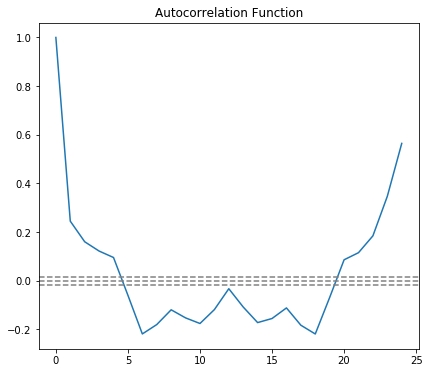

In [28]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf1)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff1)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff1)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

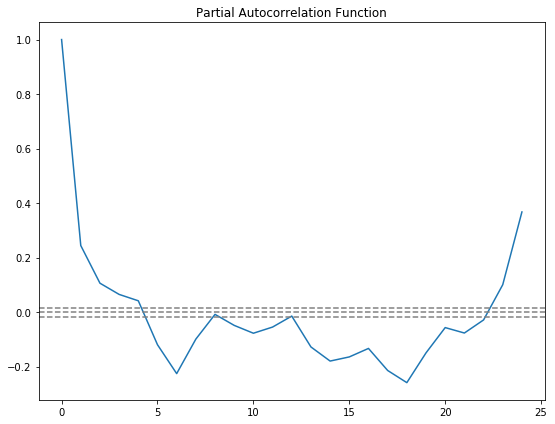

In [29]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf1)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff1)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff1)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

## ARIMA model for out of sample prediction (multiple step)

In [30]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [31]:
# seasonal difference
X = train1_df.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)

# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=2952)[0]
# invert the differenced forecast to something usable
history = [x for x in X]
result1 = []
step = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_in_year)
    print('Step %d: %f' % (step, inverted))
    history.append(inverted)
    result1.append(inverted[0])
    step += 1

Step 1: 80.050723
Step 2: 79.539820
Step 3: 69.282646
Step 4: 69.636436
Step 5: 73.987783
Step 6: 72.292698
Step 7: 58.668114
Step 8: 55.841044
Step 9: 48.953813
Step 10: 42.733310
Step 11: 40.393788
Step 12: 43.494172
Step 13: 48.423791
Step 14: 51.411825
Step 15: 66.673380
Step 16: 87.375742
Step 17: 100.499258
Step 18: 98.927028
Step 19: 94.541699
Step 20: 99.223131
Step 21: 99.844500
Step 22: 104.315191
Step 23: 93.603786
Step 24: 105.716672
Step 25: 96.682526
Step 26: 103.549921
Step 27: 82.376245
Step 28: 83.210231
Step 29: 75.084598
Step 30: 69.017039
Step 31: 56.010607
Step 32: 47.055084
Step 33: 37.132397
Step 34: 35.222844
Step 35: 29.308880
Step 36: 30.377368
Step 37: 32.421223
Step 38: 41.439558
Step 39: 46.436218
Step 40: 55.417840
Step 41: 56.392110
Step 42: 57.366171
Step 43: 56.345382
Step 44: 55.332756
Step 45: 62.329028
Step 46: 60.333082
Step 47: 53.342581
Step 48: 54.354698
Step 49: 69.366775
Step 50: 70.376773
Step 51: 59.383494
Step 52: 55.386608
Step 53: 56.38650

Step 809: 46.128951
Step 810: 43.129040
Step 811: 39.129059
Step 812: 33.129024
Step 813: 38.128954
Step 814: 42.128871
Step 815: 55.128794
Step 816: 58.128736
Step 817: 65.128703
Step 818: 100.128697
Step 819: 115.128711
Step 820: 117.128739
Step 821: 109.128772
Step 822: 119.128804
Step 823: 115.128828
Step 824: 108.128843
Step 825: 112.128847
Step 826: 112.128844
Step 827: 117.128834
Step 828: 111.128823
Step 829: 99.128811
Step 830: 95.128802
Step 831: 94.128797
Step 832: 82.128795
Step 833: 77.128796
Step 834: 60.128800
Step 835: 55.128804
Step 836: 46.128809
Step 837: 46.128813
Step 838: 46.128815
Step 839: 55.128816
Step 840: 64.128816
Step 841: 80.128814
Step 842: 96.128813
Step 843: 106.128811
Step 844: 117.128810
Step 845: 104.128809
Step 846: 111.128808
Step 847: 114.128808
Step 848: 105.128809
Step 849: 112.128810
Step 850: 118.128810
Step 851: 116.128811
Step 852: 112.128811
Step 853: 110.128811
Step 854: 105.128811
Step 855: 103.128811
Step 856: 88.128811
Step 857: 75.128

Step 1939: 121.257620
Step 1940: 108.257619
Step 1941: 115.257619
Step 1942: 118.257619
Step 1943: 109.257620
Step 1944: 116.257620
Step 1945: 122.257621
Step 1946: 120.257621
Step 1947: 116.257622
Step 1948: 114.257622
Step 1949: 109.257622
Step 1950: 107.257622
Step 1951: 92.257622
Step 1952: 79.257621
Step 1953: 70.257621
Step 1954: 60.257621
Step 1955: 51.257621
Step 1956: 49.257621
Step 1957: 52.257621
Step 1958: 62.257621
Step 1959: 68.257621
Step 1960: 78.257621
Step 1961: 104.257621
Step 1962: 111.257621
Step 1963: 118.257621
Step 1964: 105.257621
Step 1965: 114.257621
Step 1966: 110.257621
Step 1967: 108.257621
Step 1968: 110.257621
Step 1969: 113.257621
Step 1970: 117.257621
Step 1971: 114.257621
Step 1972: 105.257621
Step 1973: 102.257621
Step 1974: 96.257621
Step 1975: 84.257621
Step 1976: 74.257621
Step 1977: 62.257621
Step 1978: 54.257621
Step 1979: 49.257621
Step 1980: 46.257621
Step 1981: 52.257621
Step 1982: 58.257621
Step 1983: 66.257621
Step 1984: 79.257621
Step 1985

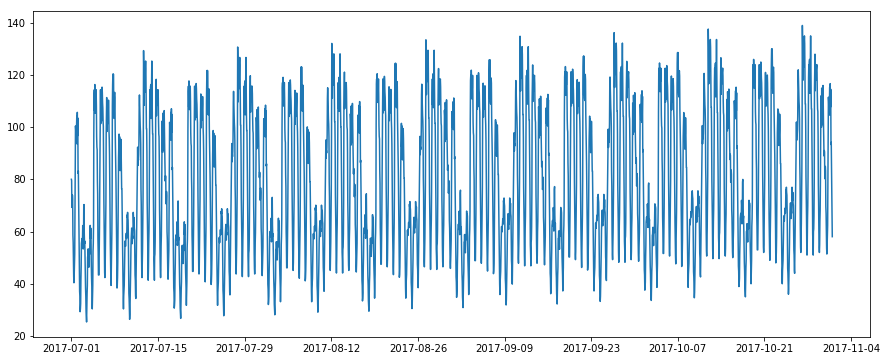

In [32]:
test1_df["Vehicles"] = result1
plt.plot(test1_df)

In [33]:
sol1 = pd.DataFrame(test1.ID)
sol1.reset_index(drop=True,inplace=True)
sol1["Vehicles"] = result1
sol1.head()

,ID,Vehicles
0,20170701001,80.050723
1,20170701011,79.539820
2,20170701021,69.282646
3,20170701031,69.636436
4,20170701041,73.987783


# Working with the second train dataframe (train2_df) where "junction" = 2

### Plotting the train2 dataframe

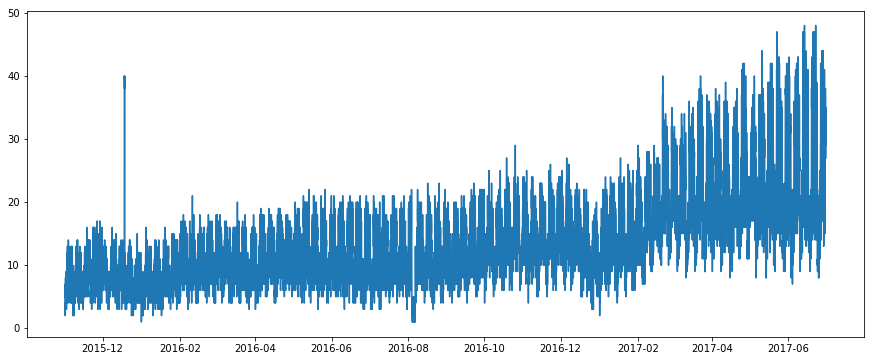

In [34]:
plt.plot(train2_df)    

### Creating a function to test the stationarity of the data

/Users/admin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  after removing the cwd from sys.path.
/Users/admin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  """


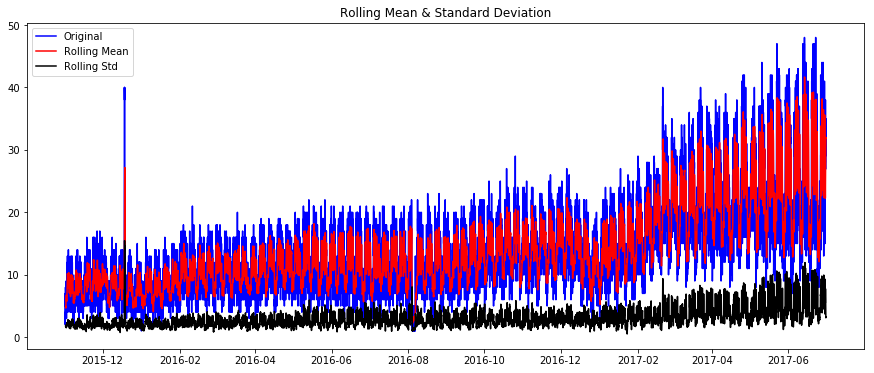

Results of Dickey-Fuller Test:
Test Statistic                -8.041077e+00
p-value                        1.846368e-12
#Lags Used                     4.200000e+01
Number of Observations Used    1.454900e+04
Critical Value (1%)           -3.430800e+00
Critical Value (5%)           -2.861739e+00
Critical Value (10%)          -2.566876e+00
dtype: float64


In [35]:
test_stationarity(train2_df)

In [36]:
float('-8.041077e+00') < float ('-3.430800e+00')

True

Since the value of Test Statistic is less than Critical Value at 1% therefore, we can say with 99% confidence that this series is stationery

## ACF & PACF for order of ARIMA model

In [37]:
#creating diffs by 1 period
ts_diff2 = train2_df - train2_df.shift()
ts_diff2.dropna(inplace=True)

In [38]:
lag_acf2 = acf(ts_diff2, nlags=24)
lag_pacf2 = pacf(ts_diff2, nlags=24, method='ols')

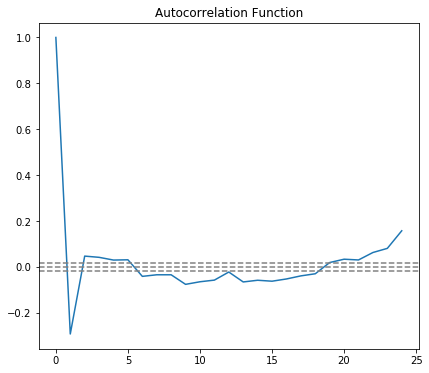

In [39]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf2)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff2)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff2)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

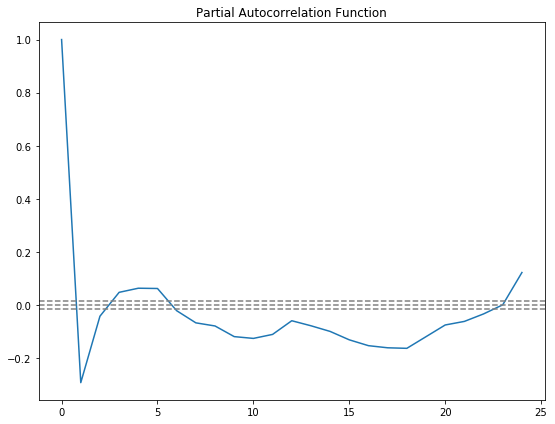

In [40]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf2)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff2)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff2)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

## ARIMA model for out of sample prediction (multiple step)

In [41]:
# seasonal difference
X = train2_df.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)

# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=2952)[0]
# invert the differenced forecast to something usable
history = [x for x in X]
result2 = []
step = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_in_year)
    print('Step %d: %f' % (step, inverted))
    history.append(inverted)
    result2.append(inverted[0])
    step += 1

Step 1: 32.084016
Step 2: 34.316345
Step 3: 32.231774
Step 4: 27.148072
Step 5: 32.944034
Step 6: 29.990097
Step 7: 24.514148
Step 8: 28.925574
Step 9: 20.204403
Step 10: 17.344648
Step 11: 14.364640
Step 12: 15.284642
Step 13: 18.177010
Step 14: 16.042632
Step 15: 21.904272
Step 16: 27.779985
Step 17: 34.681208
Step 18: 38.612811
Step 19: 29.573360
Step 20: 36.562320
Step 21: 40.575426
Step 22: 33.607141
Step 23: 34.651686
Step 24: 35.703739
Step 25: 31.758732
Step 26: 35.812795
Step 27: 32.863183
Step 28: 28.908167
Step 29: 29.946896
Step 30: 29.979235
Step 31: 23.005595
Step 32: 22.026765
Step 33: 13.043724
Step 34: 14.057512
Step 35: 15.069116
Step 36: 13.079407
Step 37: 14.089085
Step 38: 12.098668
Step 39: 15.108499
Step 40: 14.118758
Step 41: 19.129495
Step 42: 14.140664
Step 43: 15.152150
Step 44: 16.163803
Step 45: 14.175460
Step 46: 18.186966
Step 47: 20.198189
Step 48: 20.209023
Step 49: 20.219395
Step 50: 19.229261
Step 51: 17.238607
Step 52: 20.247442
Step 53: 17.255788
St

Step 815: 16.318197
Step 816: 23.320436
Step 817: 19.322590
Step 818: 28.324661
Step 819: 35.326655
Step 820: 39.328572
Step 821: 36.330416
Step 822: 38.332189
Step 823: 42.333895
Step 824: 38.335535
Step 825: 41.337113
Step 826: 42.338630
Step 827: 44.340088
Step 828: 42.341491
Step 829: 41.342840
Step 830: 41.344137
Step 831: 38.345385
Step 832: 36.346585
Step 833: 36.347739
Step 834: 31.348849
Step 835: 21.349916
Step 836: 21.350942
Step 837: 15.351930
Step 838: 18.352879
Step 839: 17.353793
Step 840: 21.354671
Step 841: 22.355516
Step 842: 32.356328
Step 843: 33.357110
Step 844: 38.357861
Step 845: 38.358584
Step 846: 40.359279
Step 847: 39.359947
Step 848: 38.360590
Step 849: 41.361209
Step 850: 41.361803
Step 851: 48.362375
Step 852: 42.362925
Step 853: 42.363454
Step 854: 40.363963
Step 855: 36.364452
Step 856: 35.364923
Step 857: 32.365375
Step 858: 27.365811
Step 859: 24.366229
Step 860: 18.366632
Step 861: 16.367019
Step 862: 19.367391
Step 863: 17.367750
Step 864: 19.368094


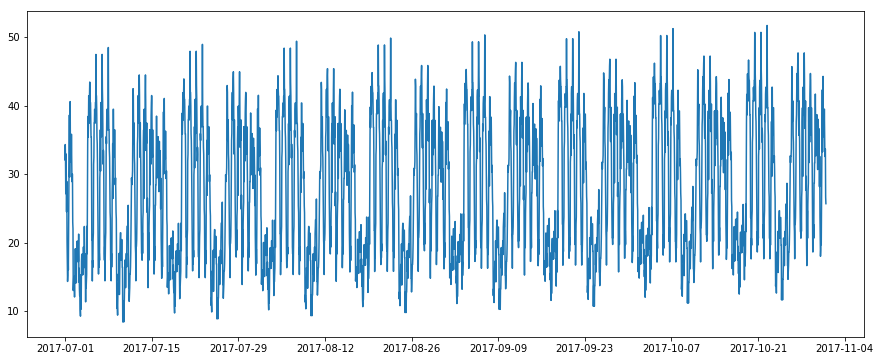

In [42]:
test2_df["Vehicles"] = result2
plt.plot(test2_df)

In [43]:
sol2 = pd.DataFrame(test2.ID)
sol2.reset_index(drop=True,inplace=True)
sol2["Vehicles"] = result2
sol2.head()

,ID,Vehicles
0,20170701002,32.084016
1,20170701012,34.316345
2,20170701022,32.231774
3,20170701032,27.148072
4,20170701042,32.944034


# Working with the third train dataframe (train3_df) where "junction" = 3

### Plotting the train3 dataframe

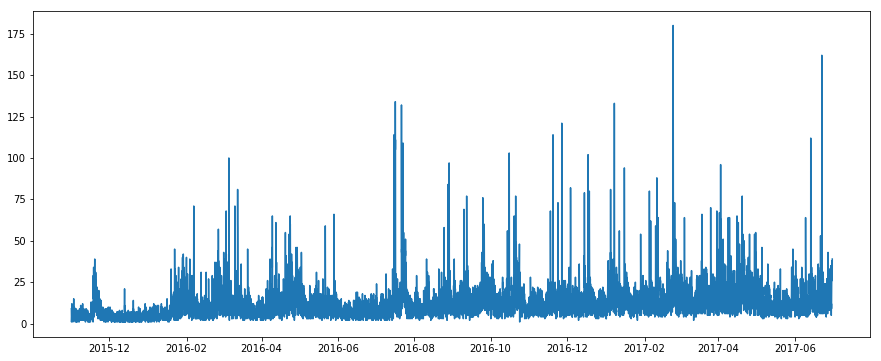

In [44]:
plt.plot(train3_df)    

### Creating a function to test the stationarity of the data

/Users/admin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  after removing the cwd from sys.path.
/Users/admin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  """


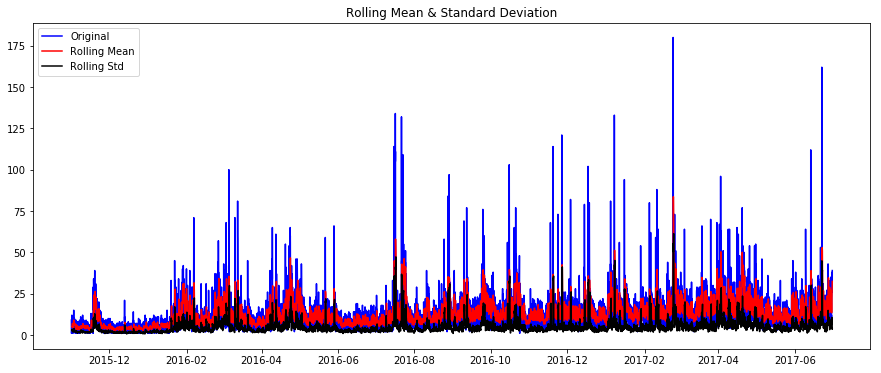

Results of Dickey-Fuller Test:
Test Statistic                -8.236600e+00
p-value                        5.867296e-13
#Lags Used                     4.200000e+01
Number of Observations Used    1.454900e+04
Critical Value (1%)           -3.430800e+00
Critical Value (5%)           -2.861739e+00
Critical Value (10%)          -2.566876e+00
dtype: float64


In [45]:
test_stationarity(train3_df)

In [46]:
float('-8.236600e+00') < float ('-3.430800e+00')

True

Since the value of Test Statistic is less than Critical Value at 1% therefore, we can say with 99% confidence that this series is stationery

## ACF & PACF for order of ARIMA model

In [47]:
#creating diffs by 1 period
ts_diff3 = train3_df - train3_df.shift()
ts_diff3.dropna(inplace=True)

In [48]:
lag_acf3 = acf(ts_diff3, nlags=24)
lag_pacf3 = pacf(ts_diff3, nlags=24, method='ols')

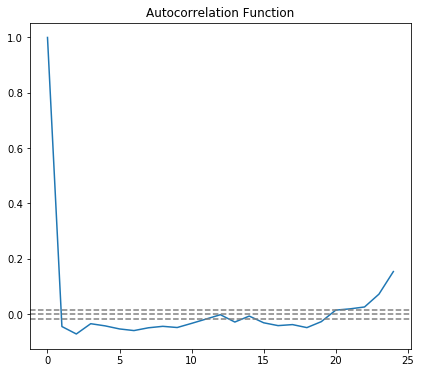

In [49]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf3)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff3)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff3)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

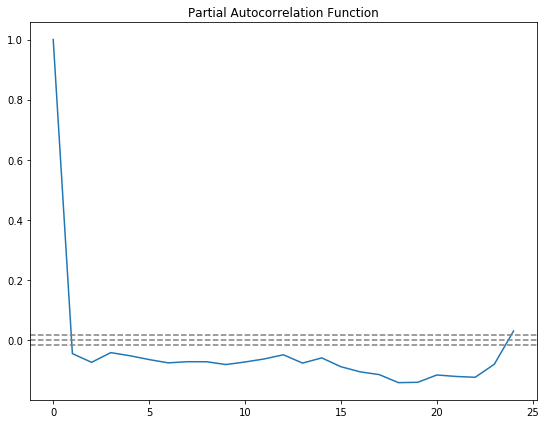

In [50]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf3)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff3)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff3)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

## ARIMA model for out of sample prediction (multiple step)

In [51]:
# seasonal difference
X = train3_df.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)

# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=2952)[0]
# invert the differenced forecast to something usable
history = [x for x in X]
result3 = []
step = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_in_year)
    print('Step %d: %f' % (step, inverted))
    history.append(inverted)
    result3.append(inverted[0])
    step += 1

Step 1: 39.100450
Step 2: 40.260378
Step 3: 39.103582
Step 4: 31.385708
Step 5: 23.725159
Step 6: 20.413942
Step 7: 13.010548
Step 8: 12.291929
Step 9: 9.052651
Step 10: 9.143460
Step 11: 9.435271
Step 12: 11.805038
Step 13: 12.159891
Step 14: 17.449301
Step 15: 16.652597
Step 16: 19.768894
Step 17: 25.810172
Step 18: 27.795141
Step 19: 23.743816
Step 20: 21.673897
Step 21: 28.599074
Step 22: 28.528573
Step 23: 22.467494
Step 24: 22.417629
Step 25: 23.378456
Step 26: 25.348105
Step 27: 20.324150
Step 28: 18.304173
Step 29: 19.286125
Step 30: 17.268482
Step 31: 13.250270
Step 32: 13.231000
Step 33: 11.210553
Step 34: 10.189058
Step 35: 10.166776
Step 36: 8.144012
Step 37: 8.121052
Step 38: 15.098128
Step 39: 17.075407
Step 40: 20.052986
Step 41: 19.030908
Step 42: 32.009174
Step 43: 13.987761
Step 44: 22.966631
Step 45: 20.945746
Step 46: 17.925069
Step 47: 22.904573
Step 48: 15.884240
Step 49: 20.864056
Step 50: 16.844019
Step 51: 22.824126
Step 52: 17.804380
Step 53: 15.784784
Step 54

Step 816: 14.149707
Step 817: 13.134135
Step 818: 28.118692
Step 819: 33.103375
Step 820: 35.088183
Step 821: 31.073117
Step 822: 37.058174
Step 823: 33.043354
Step 824: 27.028655
Step 825: 37.014078
Step 826: 38.999620
Step 827: 29.985280
Step 828: 29.971059
Step 829: 22.956954
Step 830: 36.942965
Step 831: 27.929090
Step 832: 18.915330
Step 833: 12.901683
Step 834: 15.888148
Step 835: 9.874724
Step 836: 10.861410
Step 837: 10.848205
Step 838: 10.835109
Step 839: 11.822120
Step 840: 15.809238
Step 841: 18.796462
Step 842: 30.783791
Step 843: 28.771224
Step 844: 31.758759
Step 845: 27.746398
Step 846: 34.734137
Step 847: 29.721978
Step 848: 29.709918
Step 849: 26.697957
Step 850: 28.686095
Step 851: 26.674330
Step 852: 20.662661
Step 853: 24.651089
Step 854: 21.639611
Step 855: 21.628227
Step 856: 19.616937
Step 857: 17.605740
Step 858: 15.594635
Step 859: 12.583621
Step 860: 12.572697
Step 861: 8.561863
Step 862: 9.551118
Step 863: 9.540461
Step 864: 12.529891
Step 865: 15.519409
Step

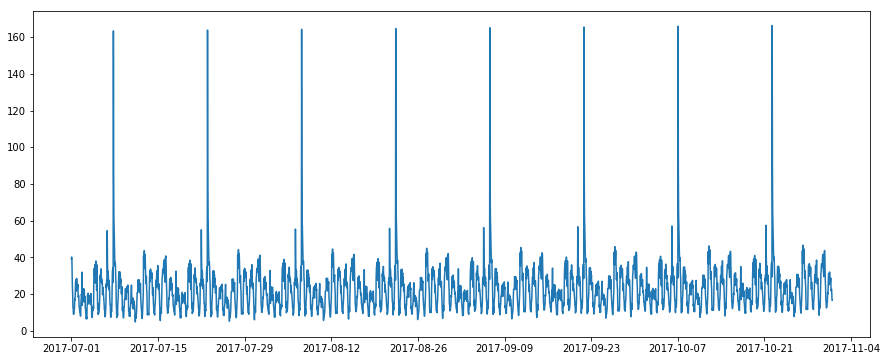

In [52]:
test3_df["Vehicles"] = result3
plt.plot(test3_df)

In [53]:
sol3 = pd.DataFrame(test3.ID)
sol3.reset_index(drop=True,inplace=True)
sol3["Vehicles"] = result3
sol3.head()

,ID,Vehicles
0,20170701003,39.100450
1,20170701013,40.260378
2,20170701023,39.103582
3,20170701033,31.385708
4,20170701043,23.725159


# Working with the fourth train dataframe (train4_df) where "junction" = 4

### Plotting the train4 dataframe

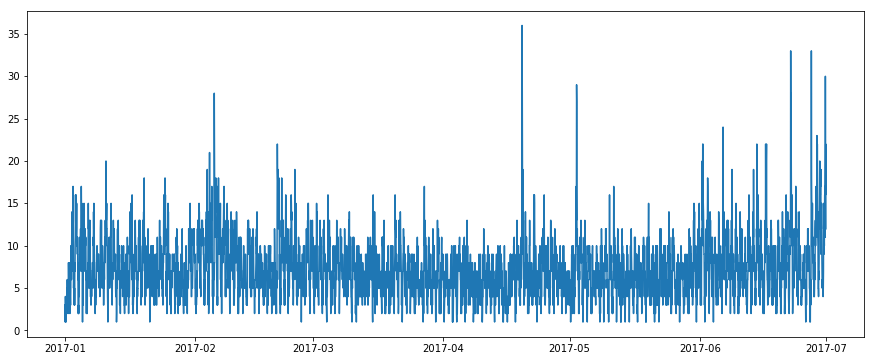

In [54]:
plt.plot(train4_df)    

### Creating a function to test the stationarity of the data

/Users/admin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  after removing the cwd from sys.path.
/Users/admin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()
  """


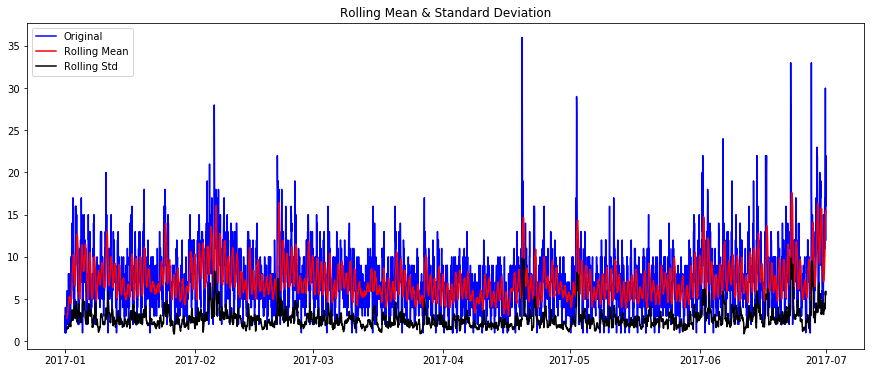

Results of Dickey-Fuller Test:
Test Statistic                -6.726732e+00
p-value                        3.374875e-09
#Lags Used                     3.000000e+01
Number of Observations Used    4.313000e+03
Critical Value (1%)           -3.431867e+00
Critical Value (5%)           -2.862210e+00
Critical Value (10%)          -2.567127e+00
dtype: float64


In [55]:
test_stationarity(train4_df)

In [56]:
float('-6.726732e+00') < float ('-3.430800e+00')

True

Since the value of Test Statistic is less than Critical Value at 1% therefore, we can say with 99% confidence that this series is stationery

## ACF & PACF for order of ARIMA model

In [57]:
#creating diffs by 1 period
ts_diff4 = train4_df - train4_df.shift()
ts_diff4.dropna(inplace=True)

In [58]:
lag_acf4 = acf(ts_diff4, nlags=24)
lag_pacf4 = pacf(ts_diff4, nlags=24, method='ols')

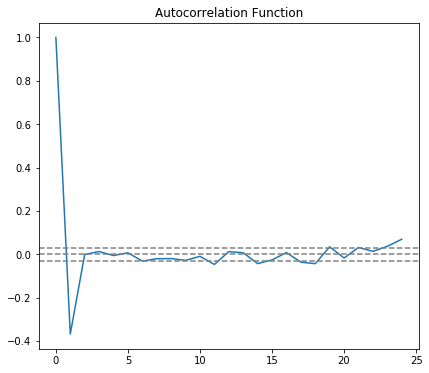

In [59]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf4)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff4)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff4)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

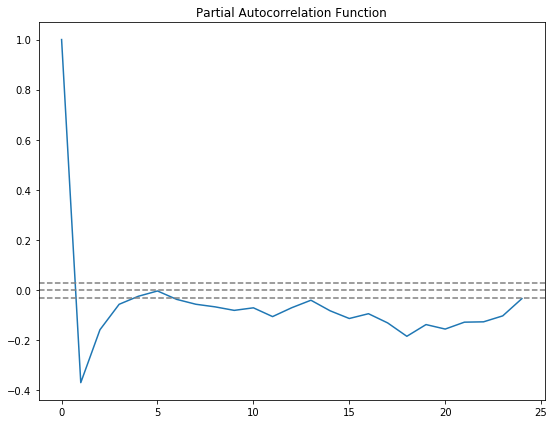

In [60]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf4)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff4)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff4)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

## ARIMA model for out of sample prediction (multiple step)

In [61]:
# seasonal difference
X = train4_df.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)

# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=2952)[0]
# invert the differenced forecast to something usable
history = [x for x in X]
result4 = []
step = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_in_year)
    print('Step %d: %f' % (step, inverted))
    history.append(inverted)
    result4.append(inverted[0])
    step += 1

Step 1: 13.923326
Step 2: 9.062319
Step 3: 5.806232
Step 4: 6.690725
Step 5: 4.709470
Step 6: 2.263216
Step 7: 0.036583
Step 8: 5.058888
Step 9: 4.265720
Step 10: 3.556802
Step 11: 3.897510
Step 12: 2.239474
Step 13: 1.556158
Step 14: 4.827203
Step 15: 8.042863
Step 16: 11.201874
Step 17: 8.307222
Step 18: 10.365873
Step 19: 13.386590
Step 20: 9.378804
Step 21: 22.351562
Step 22: 15.312869
Step 23: 13.269361
Step 24: 9.226120
Step 25: 20.186711
Step 26: 22.153329
Step 27: 11.127014
Step 28: 12.107905
Step 29: 7.095493
Step 30: 6.088854
Step 31: 6.086849
Step 32: 5.088284
Step 33: 3.092027
Step 34: 5.097082
Step 35: 5.102639
Step 36: 7.108080
Step 37: 5.112982
Step 38: 10.117090
Step 39: 5.120292
Step 40: 9.122583
Step 41: 4.124039
Step 42: 9.124783
Step 43: 4.124962
Step 44: 6.124726
Step 45: 6.124218
Step 46: 9.123560
Step 47: 8.122853
Step 48: 7.122169
Step 49: 7.121560
Step 50: 12.121056
Step 51: 11.120667
Step 52: 13.120393
Step 53: 12.120223
Step 54: 12.120141
Step 55: 8.120127
St

Step 803: 10.362023
Step 804: 7.362015
Step 805: 8.362010
Step 806: 6.362006
Step 807: 10.362004
Step 808: 7.362003
Step 809: 3.362003
Step 810: 2.362003
Step 811: 5.362005
Step 812: 6.362006
Step 813: 5.362007
Step 814: 2.362009
Step 815: 5.362010
Step 816: 3.362011
Step 817: 4.362012
Step 818: 6.362012
Step 819: 9.362012
Step 820: 10.362012
Step 821: 7.362012
Step 822: 13.362012
Step 823: 13.362012
Step 824: 13.362012
Step 825: 11.362012
Step 826: 7.362012
Step 827: 9.362011
Step 828: 7.362011
Step 829: 8.362011
Step 830: 11.362011
Step 831: 6.362011
Step 832: 8.362011
Step 833: 4.362011
Step 834: 4.362011
Step 835: 6.362011
Step 836: 4.362011
Step 837: 2.362011
Step 838: 5.362011
Step 839: 2.362011
Step 840: 6.362011
Step 841: 5.362011
Step 842: 8.362011
Step 843: 10.362011
Step 844: 9.362011
Step 845: 9.362011
Step 846: 7.362011
Step 847: 14.362011
Step 848: 6.362011
Step 849: 11.362011
Step 850: 9.362011
Step 851: 10.362011
Step 852: 11.362011
Step 853: 8.362011
Step 854: 12.36201

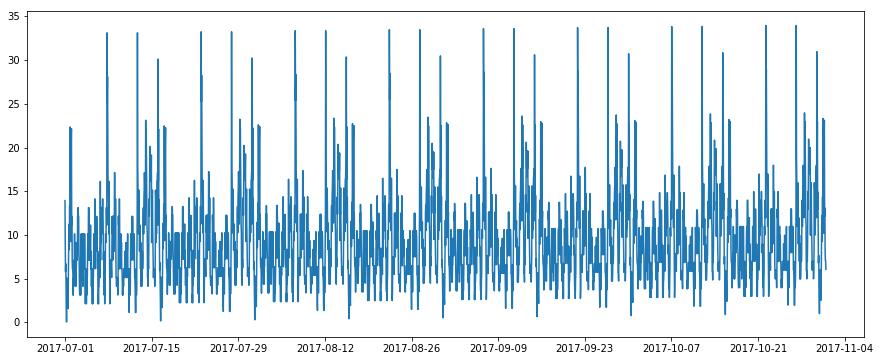

In [62]:
test4_df["Vehicles"] = result4
plt.plot(test4_df)

In [63]:
sol4 = pd.DataFrame(test4.ID)
sol4.reset_index(drop=True,inplace=True)
sol4["Vehicles"] = result4
sol4.head()

,ID,Vehicles
0,20170701004,13.923326
1,20170701014,9.062319
2,20170701024,5.806232
3,20170701034,6.690725
4,20170701044,4.709470


# Creating the solution dataframe by joining four different dataframes obtained

In [64]:
solution = pd.concat([sol1,sol2,sol3,sol4])

In [65]:
solution.head()

,ID,Vehicles
0,20170701001,80.050723
1,20170701011,79.539820
2,20170701021,69.282646
3,20170701031,69.636436
4,20170701041,73.987783


In [66]:
#rounding the values of "Vehicles" to get integer values
solution.Vehicles = solution.Vehicles.round()

In [67]:
#exporting a csv file with solution
solution.to_csv(path_or_buf="solution.csv",index=False)